In [1]:
from SpecularAnalysis import *


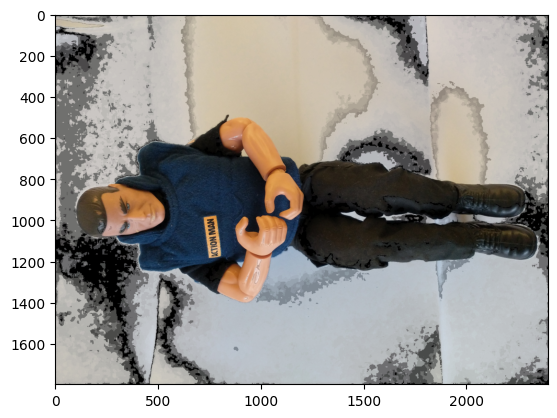

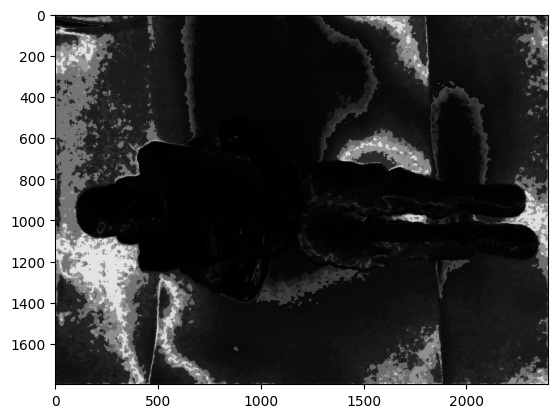

In [3]:
# Example 1
rgb_img = imageio.imread("photos/actionman_whitebg.jpg")
#rgb_img = imageio.imread("photos/coloured_cubes_sample-removebg-preview.png")
rgb_img= rgb_img[:,:,0:3] #remove alpha channel
D, S= specular_removal(rgb_img,0.7,show= 0)

plt.imshow(D)
plt.figure()
plt.imshow(S, cmap='gray')

True

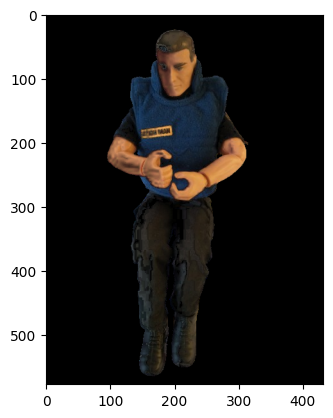

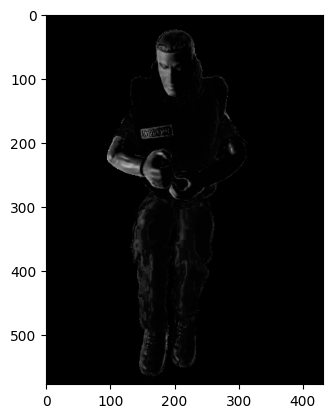

In [13]:
# Example 1
rgb_img = imageio.imread("photos/actionman_nobg.png")
#rgb_img = imageio.imread("photos/coloured_cubes_sample-removebg-preview.png")
rgb_img= rgb_img[:,:,0:3] #remove alpha channel
D, S= specular_removal(rgb_img,0.7,show= 0)

plt.imshow(D)
plt.figure()
plt.imshow(S, cmap='gray')
# save data as image
#turn form rgb to bgr
D= cv.cvtColor(D, cv.COLOR_RGB2BGR)
cv.imwrite('action_man_diffuse.jpg', D)
cv.imwrite('action_man_specular.jpg', S)

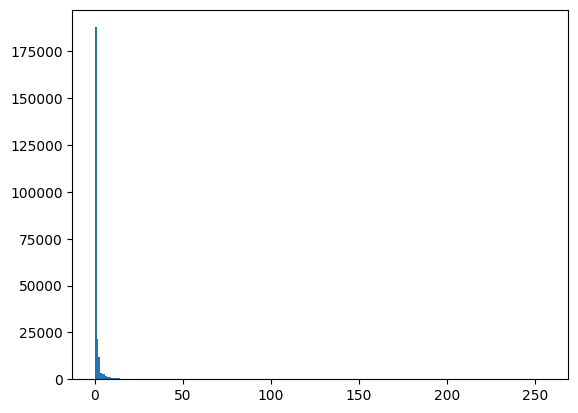

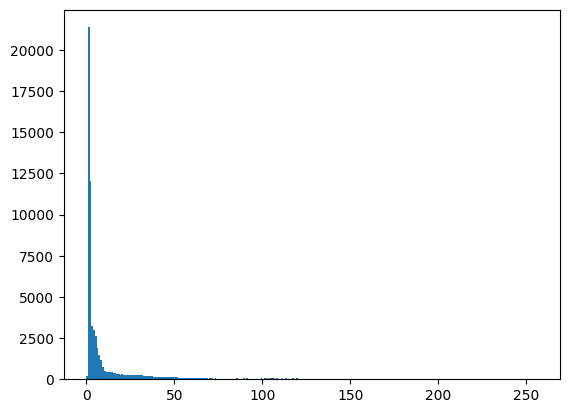

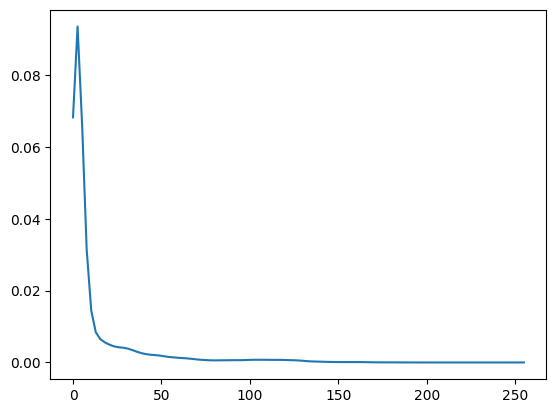

In [14]:
from scipy.stats import gaussian_kde

# show histogram for the specular image
plt.figure()
plt.hist(S.ravel(),256,[0,256])
# remove black
S2= S[S>0]
plt.figure()
plt.hist(S2.ravel(),256,[0,256])

# kernel density estimation
kde = gaussian_kde(S2.ravel())
dist_space = np.linspace(0, 255, 100)
plt.figure()
plt.plot(dist_space, kde(dist_space))


percentage of image covered by specular: 24.922250551350658
average intensity of specular pixels: 12.970306592373737
standard deviation of intensity of specular pixels: 25.09818205829016
[24.92225055 12.97030659 25.09818206] percentage, average_intensity, std_intensity


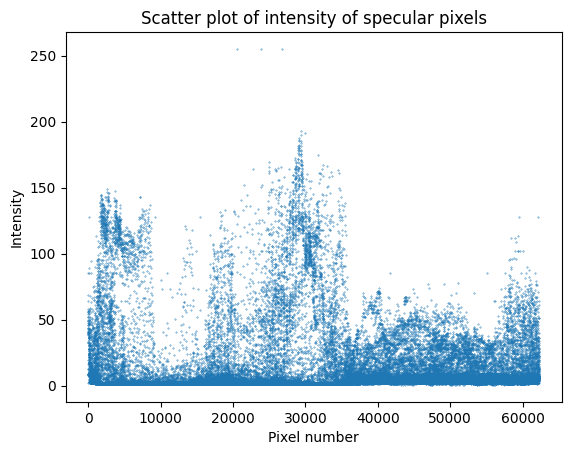

In [26]:
# percentage of image covered by specular 
percentage= np.sum(S>0)/S.size*100
print('percentage of image covered by specular:', percentage)

#average intensity of specular pixels
average_intensity= np.mean(S2)
print('average intensity of specular pixels:', average_intensity)

#standard deviation of intensity of specular pixels
std_intensity= np.std(S2)
print('standard deviation of intensity of specular pixels:', std_intensity)

#scatter plot of intensity of specular pixels
plt.figure()
plt.scatter(range(S2.size), S2, s=0.1)
plt.xlabel('Pixel number')
plt.ylabel('Intensity')
plt.title('Scatter plot of intensity of specular pixels')


#store in an array 
specular_data= np.array([percentage, average_intensity, std_intensity  ])
print(specular_data, 'percentage, average_intensity, std_intensity')

def extract_specular_data(specular_image, mask):
    S= specular_image[mask>0]
    # percentage of image covered by specular
    percentage = np.sum(mask > 0) / mask.size * 100
    # average intensity of specular pixels
    average_intensity = np.mean(S)
    # standard deviation of intensity of specular pixels
    std_intensity = np.std(S) 
    return np.array([percentage, average_intensity, std_intensity])

    
